# EDA & Data Transformation

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("thyroid.csv")

In [3]:
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,target
0,41.0,F,f,f,f,f,f,f,f,f,...,t,2.5,t,125.0,t,1.14,t,109.0,f,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,t,2.0,t,102.0,f,NaN,f,NaN,f,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,f,NaN,t,109.0,t,0.91,t,120.0,f,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,t,1.9,t,175.0,f,NaN,f,NaN,f,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,t,1.2,t,61.0,t,0.87,t,70.0,f,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,70.0,M,f,f,f,f,f,f,f,f,...,f,NaN,t,155.0,t,1.05,t,148.0,f,negative
2796,73.0,M,f,t,f,f,f,f,f,f,...,t,0.7,t,63.0,t,0.88,t,72.0,f,negative
2797,75.0,M,f,f,f,f,f,f,f,f,...,f,NaN,t,147.0,t,0.80,t,183.0,f,negative
2798,60.0,F,f,f,f,f,f,f,f,f,...,f,NaN,t,100.0,t,0.83,t,121.0,f,negative


In [4]:
df.shape

(2800, 28)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        2799 non-null   float64
 1   sex                        2690 non-null   object 
 2   on thyroxine               2800 non-null   object 
 3   query on thyroxine         2800 non-null   object 
 4   on antithyroid medication  2800 non-null   object 
 5   sick                       2800 non-null   object 
 6   pregnant                   2800 non-null   object 
 7   thyroid surgery            2800 non-null   object 
 8   I131 treatment             2800 non-null   object 
 9   query hypothyroid          2800 non-null   object 
 10  query hyperthyroid         2800 non-null   object 
 11  lithium                    2800 non-null   object 
 12  goitre                     2800 non-null   object 
 13  tumor                      2800 non-null   objec

In [6]:
for column in df.columns:
    count = df[column][df[column]=='?'].count()
    if count==0:
        print(column, count)

age 0
sex 0
on thyroxine 0
query on thyroxine 0
on antithyroid medication 0
sick 0
pregnant 0
thyroid surgery 0
I131 treatment 0
query hypothyroid 0
query hyperthyroid 0
lithium 0
goitre 0
tumor 0
hypopituitary 0
psych 0
TSH measured 0
TSH 0
T3 measured 0
T3 0
TT4 measured 0
TT4 0
T4U measured 0
T4U 0
FTI measured 0
FTI 0
TBG measured 0
target 0


In [7]:
df = df.drop(['TSH measured','T3 measured','TT4 measured','T4U measured',\
              'FTI measured','TBG measured'], axis = 1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        2799 non-null   float64
 1   sex                        2690 non-null   object 
 2   on thyroxine               2800 non-null   object 
 3   query on thyroxine         2800 non-null   object 
 4   on antithyroid medication  2800 non-null   object 
 5   sick                       2800 non-null   object 
 6   pregnant                   2800 non-null   object 
 7   thyroid surgery            2800 non-null   object 
 8   I131 treatment             2800 non-null   object 
 9   query hypothyroid          2800 non-null   object 
 10  query hyperthyroid         2800 non-null   object 
 11  lithium                    2800 non-null   object 
 12  goitre                     2800 non-null   object 
 13  tumor                      2800 non-null   objec

In [9]:
df[df.duplicated()]

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,target
204,26.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,NaN,negative
210,64.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,NaN,negative
303,22.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,NaN,negative
431,58.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,NaN,negative
717,40.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,NaN,negative
820,41.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,NaN,negative
846,26.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,NaN,negative
925,58.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,NaN,negative
1017,57.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,NaN,negative
1047,57.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,NaN,negative


In [10]:
df.duplicated().sum()

47

In [13]:
df = df.drop_duplicates().reset_index(drop=True)

In [14]:
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,target
0,41.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,1.30,2.5,125.0,1.14,109.0,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,4.10,2.0,102.0,NaN,NaN,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,f,f,f,f,0.98,NaN,109.0,0.91,120.0,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,f,f,f,f,0.16,1.9,175.0,NaN,NaN,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,0.72,1.2,61.0,0.87,70.0,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2748,70.0,M,f,f,f,f,f,f,f,f,...,f,f,f,f,2.70,NaN,155.0,1.05,148.0,negative
2749,73.0,M,f,t,f,f,f,f,f,f,...,f,f,f,f,NaN,0.7,63.0,0.88,72.0,negative
2750,75.0,M,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,147.0,0.80,183.0,negative
2751,60.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,1.40,NaN,100.0,0.83,121.0,negative


In [41]:
# df.to_csv("thyroid1.csv")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2753 entries, 0 to 2752
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        2752 non-null   float64
 1   sex                        2644 non-null   object 
 2   on thyroxine               2753 non-null   object 
 3   query on thyroxine         2753 non-null   object 
 4   on antithyroid medication  2753 non-null   object 
 5   sick                       2753 non-null   object 
 6   pregnant                   2753 non-null   object 
 7   thyroid surgery            2753 non-null   object 
 8   I131 treatment             2753 non-null   object 
 9   query hypothyroid          2753 non-null   object 
 10  query hyperthyroid         2753 non-null   object 
 11  lithium                    2753 non-null   object 
 12  goitre                     2753 non-null   object 
 13  tumor                      2753 non-null   objec

In [42]:
df.isnull().sum()

age                            1
sex                          109
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH                          237
T3                           538
TT4                          137
T4U                          250
FTI                          248
target                         0
dtype: int64

In [66]:
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,target
0,41.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,1.30,2.5,125.0,1.14,109.0,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,4.10,2.0,102.0,NaN,NaN,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,f,f,f,f,0.98,NaN,109.0,0.91,120.0,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,f,f,f,f,0.16,1.9,175.0,NaN,NaN,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,0.72,1.2,61.0,0.87,70.0,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2748,70.0,M,f,f,f,f,f,f,f,f,...,f,f,f,f,2.70,NaN,155.0,1.05,148.0,negative
2749,73.0,M,f,t,f,f,f,f,f,f,...,f,f,f,f,NaN,0.7,63.0,0.88,72.0,negative
2750,75.0,M,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,147.0,0.80,183.0,negative
2751,60.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,1.40,NaN,100.0,0.83,121.0,negative


### Pipline
   - Imputer
   - Encoding
   - Scaling

# <p style="padding:10px;background-color:#E9967A;margin:10;color:#0000FF;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px;overflow:hidden;font-weight:30">Creating Data Transformation Pipeline</p>

In [48]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [64]:
num_pipeline = Pipeline(
steps=[
    ("Imputer", SimpleImputer(strategy= "median")),
    ("Scaler", StandardScaler())
]
)


cat_pipeline = Pipeline(
steps=[
    ("Imputer", SimpleImputer(strategy= "most_frequent")),
    ("One_hot_encoder", OneHotEncoder()),
    ("Scaler", StandardScaler())
]
)

preprocessor = ColumnTransformer([
    ('num_pipeline', num_pipeline, numric_columns),
    ('cat_pipeline', cat_pipeline, categorical_columns)
])

In [55]:
num_pipeline

Pipeline(steps=[('Imputer', SimpleImputer(strategy='median')),
                ('Scaler', StandardScaler())])

In [56]:
cat_pipeline

Pipeline(steps=[('Imputer', SimpleImputer(strategy='most_frequent')),
                ('One_hot_encoder', OneHotEncoder()),
                ('Scaler', StandardScaler())])

In [57]:
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('Imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('Scaler', StandardScaler())]),
                                 Index(['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI'], dtype='object')),
                                ('cat_pipeline',
                                 Pipeline(steps=[('Imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('One_hot_encoder',
                                                  OneHotEncoder()),
                                                 ('Scaler', StandardScaler())]),
                                 Index(['sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'target'],
      dtype='object'))])

In [65]:
df.isnull().sum().any()

True

In [46]:
df['target'].value_counts()

target
negative        2456
hypothyroid      220
hyperthyroid      77
Name: count, dtype: int64

In [29]:
df.duplicated().sum()

0

In [30]:
df['sex'].value_counts()

sex
F    1786
M     858
Name: count, dtype: int64

In [32]:
df.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'target'],
      dtype='object')

In [35]:
numric_columns = df.columns[df.dtypes!='object']
numric_columns

Index(['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI'], dtype='object')

In [36]:
categorical_columns = df.columns[df.dtypes=='object']
categorical_columns

Index(['sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'target'],
      dtype='object')

In [37]:
df[numric_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
age,2752.0,51.967297,20.511906,1.000,36.00,55.00,67.00,455.00
TSH,2516.0,4.672150,21.449453,0.005,0.44,1.40,2.60,478.00
T3,2215.0,2.024966,0.824600,0.050,1.60,2.00,2.40,10.60
TT4,2616.0,109.072401,35.392443,2.000,88.00,104.00,125.00,430.00
T4U,2503.0,0.997912,0.194390,0.310,0.88,0.98,1.08,2.12
FTI,2505.0,110.787984,32.883986,2.000,93.00,107.00,124.00,395.00


In [38]:
df[categorical_columns].describe().T

,count,unique,top,freq
sex,2644,2,F,1786
on thyroxine,2753,2,f,2423
query on thyroxine,2753,2,f,2713
on antithyroid medication,2753,2,f,2720
sick,2753,2,f,2643
pregnant,2753,2,f,2712
thyroid surgery,2753,2,f,2714
I131 treatment,2753,2,f,2705
query hypothyroid,2753,2,f,2590
query hyperthyroid,2753,2,f,2583


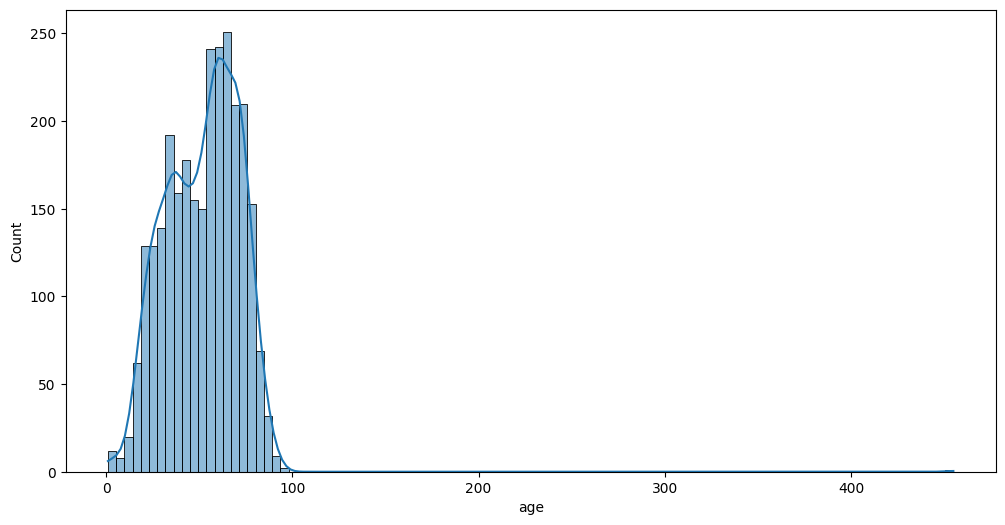

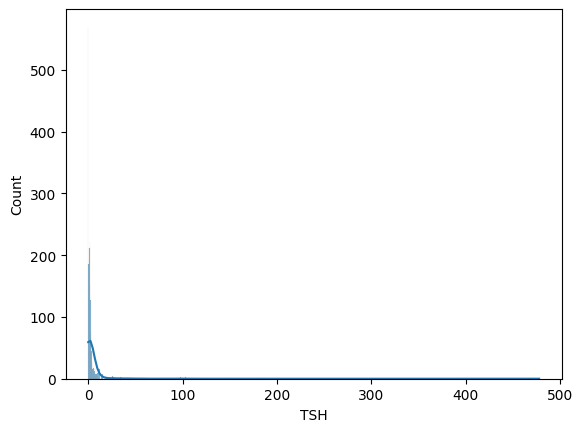

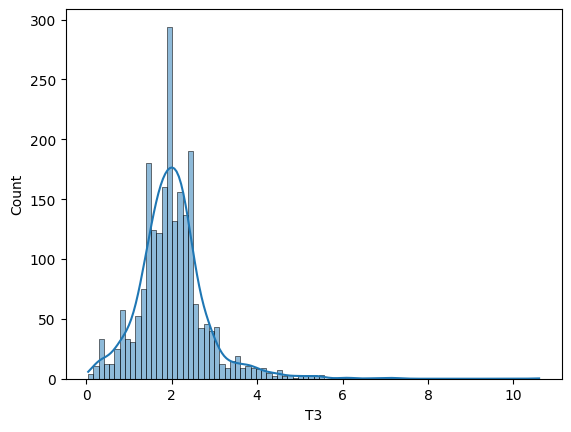

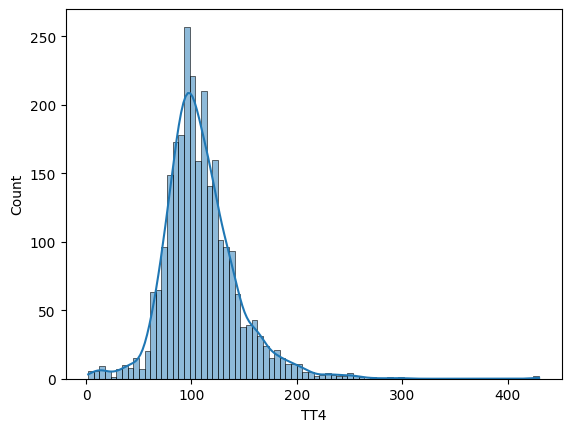

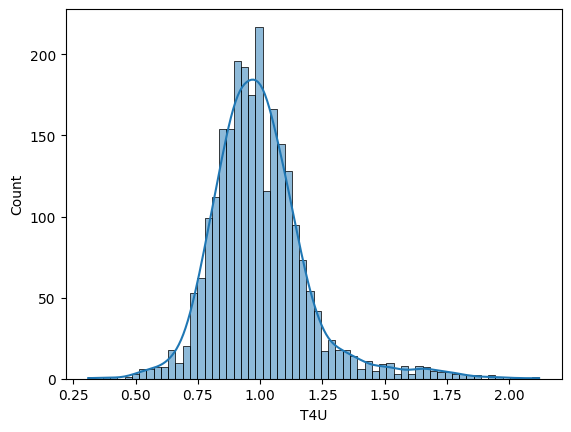

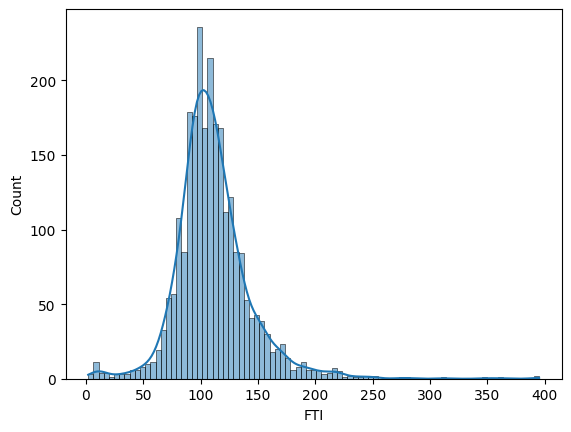

In [40]:
plt.figure(figsize=(12,6))
x=0
for i in numric_columns:
    sns.histplot(data=df, x=i, kde=True)
    plt.show()

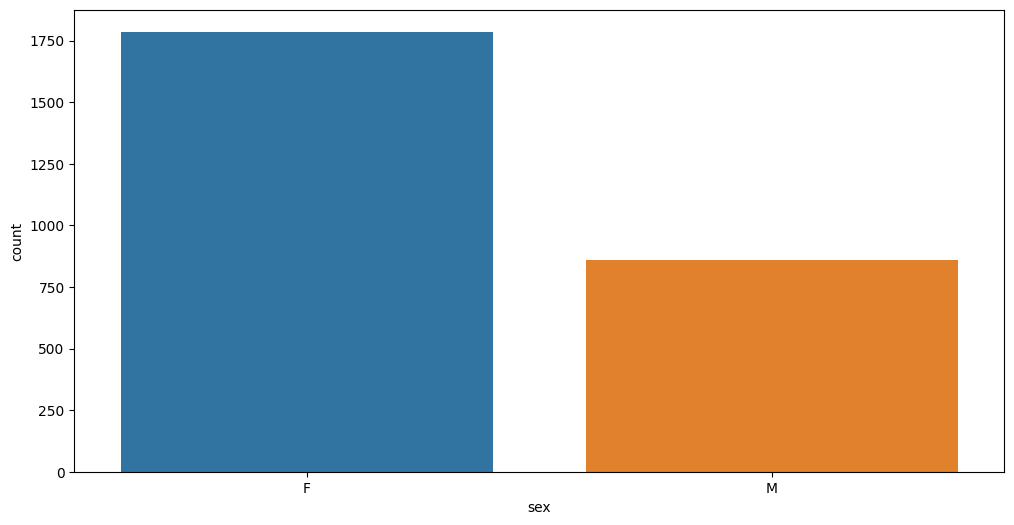

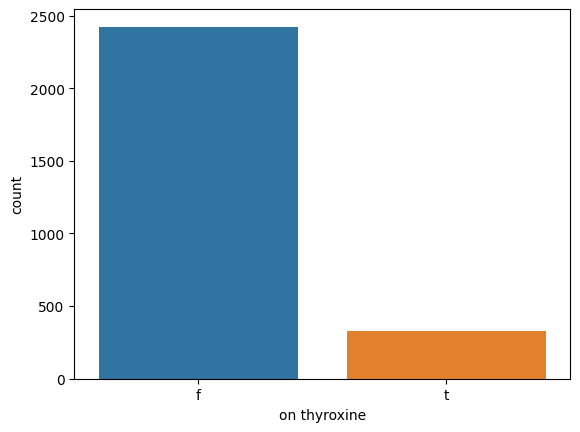

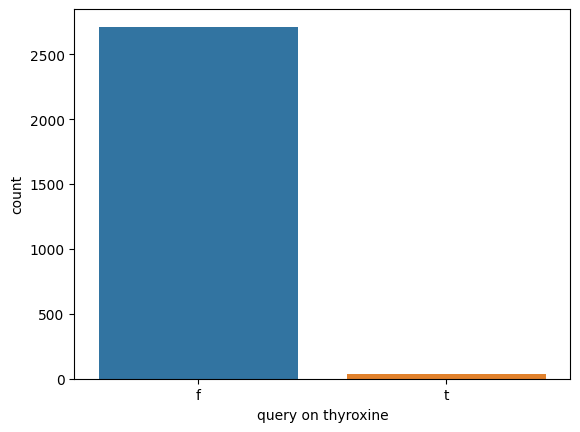

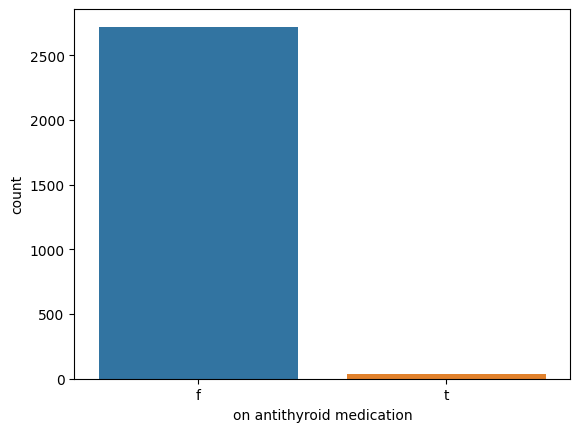

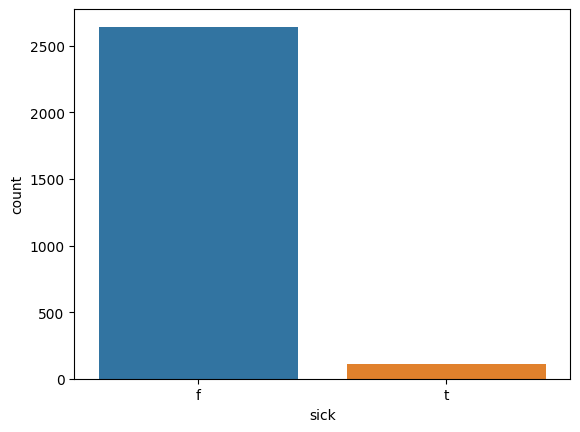

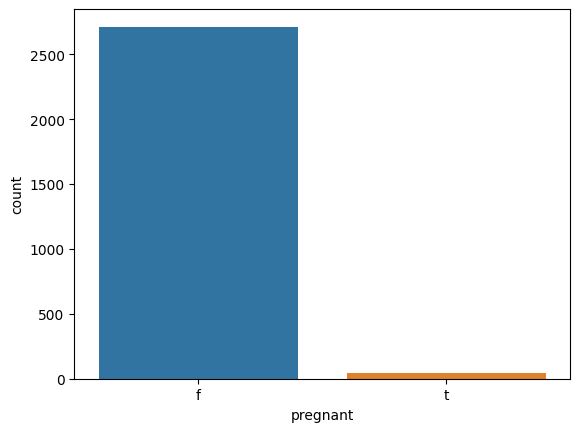

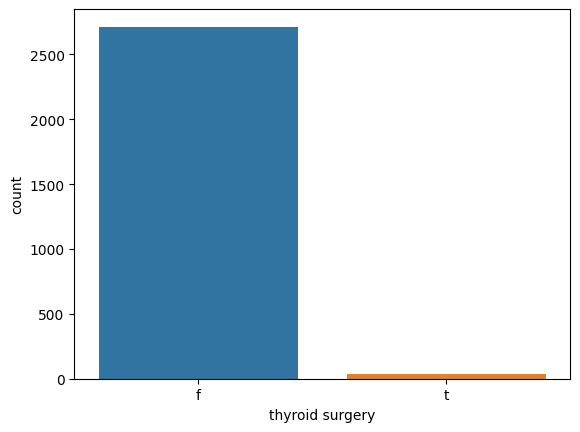

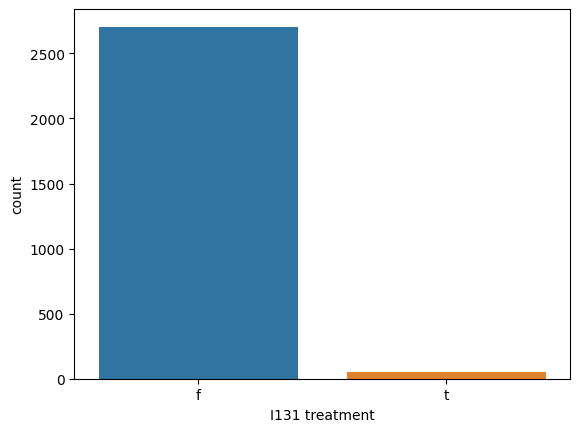

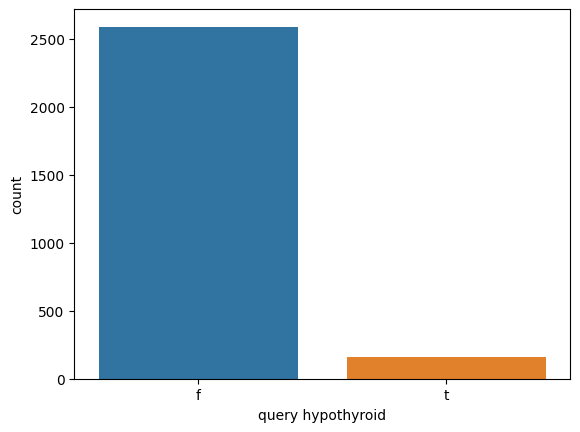

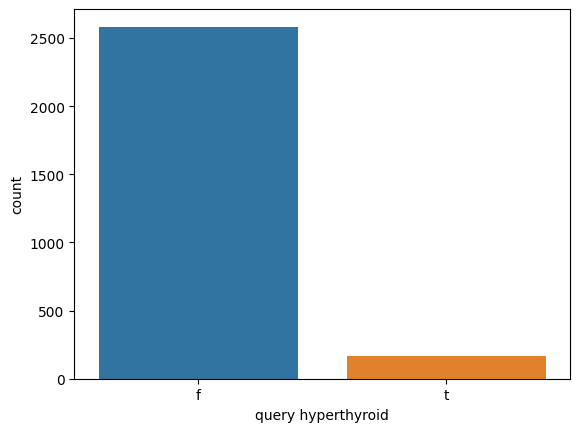

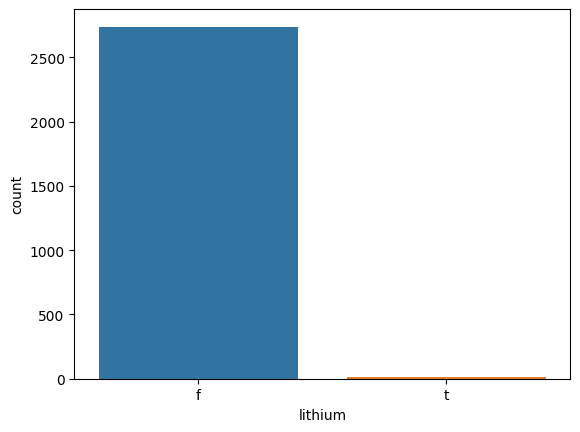

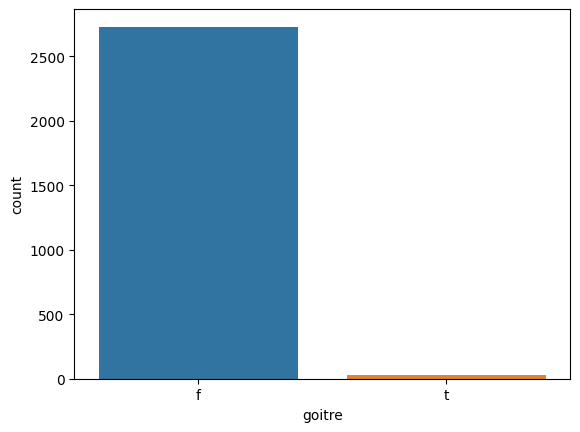

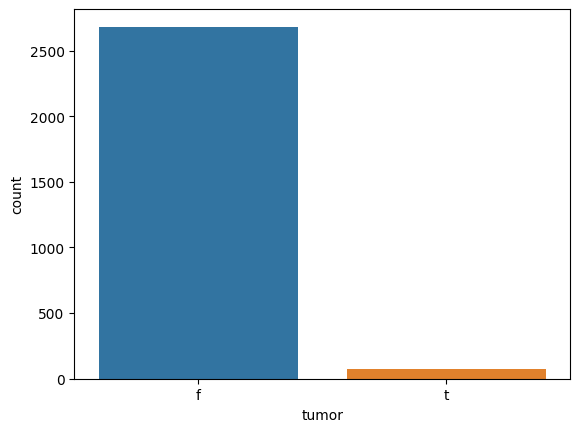

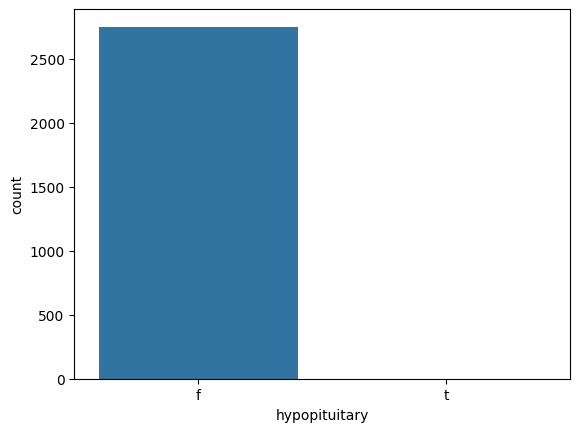

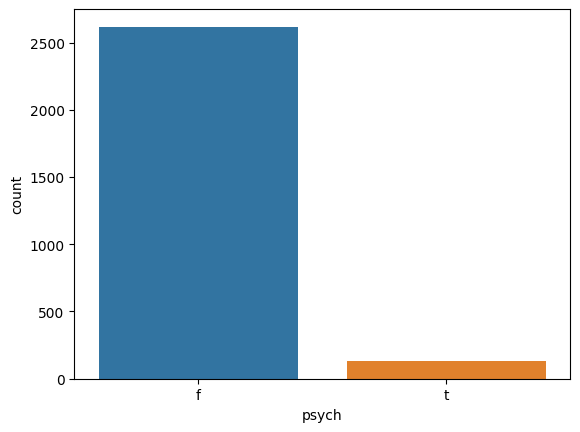

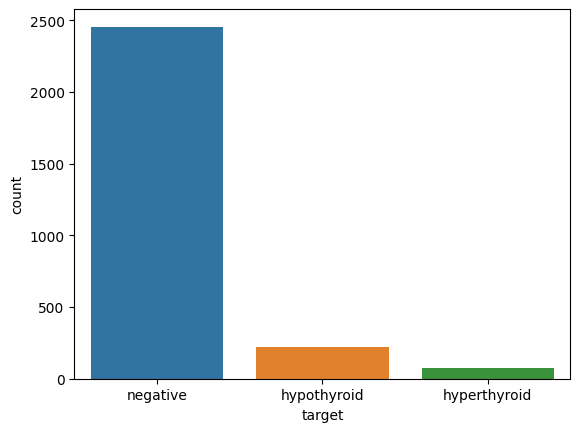

In [76]:
plt.figure(figsize=(12,6))
x=0
for i in categorical_columns:
    sns.countplot(data=df, x=i)
    plt.show()

In [44]:
import warnings
warnings.filterwarnings('ignore')

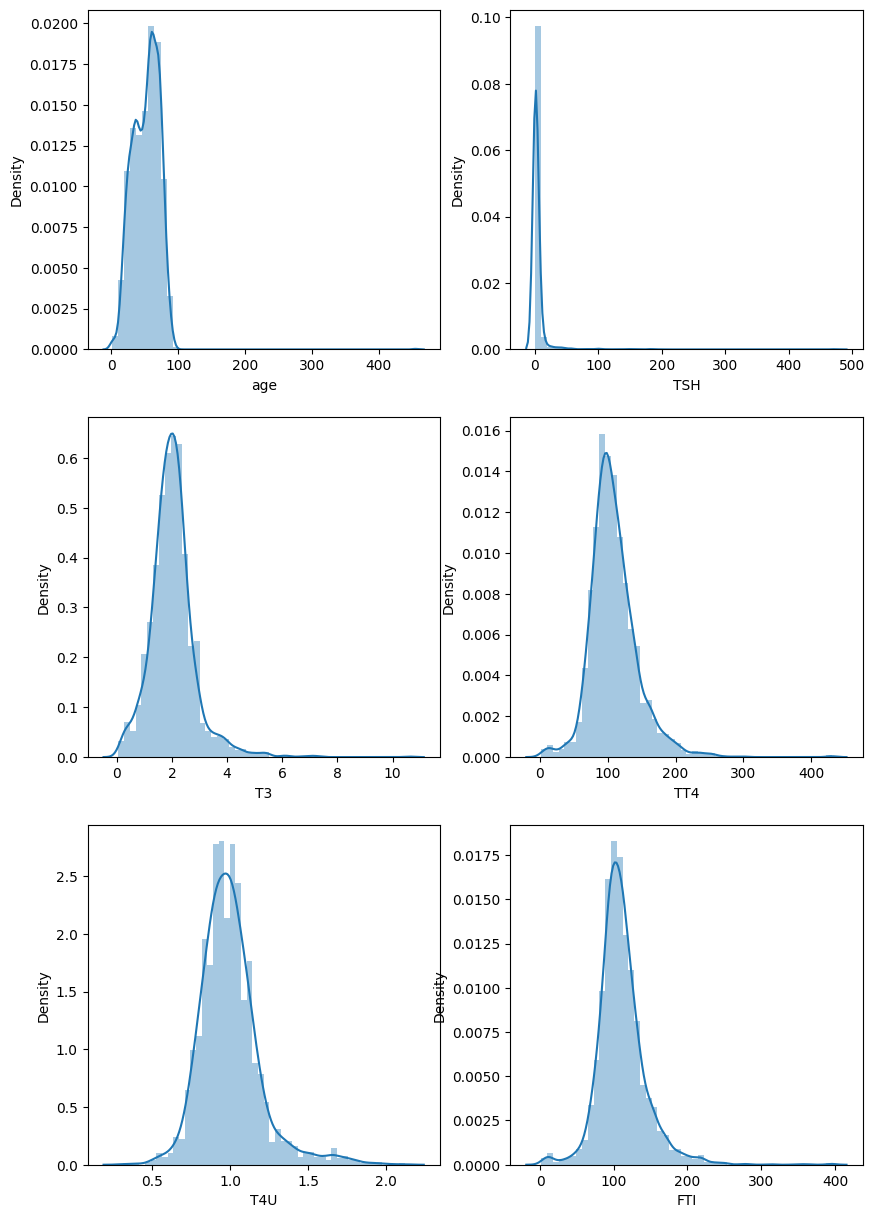

In [67]:
plt.figure(figsize=(10,15))
x=1

for i in numric_columns:
    ax = plt.subplot(3,2,x)
    sns.distplot(df[i])
    plt.xlabel(i, fontsize=10)
    x+=1
plt.show()

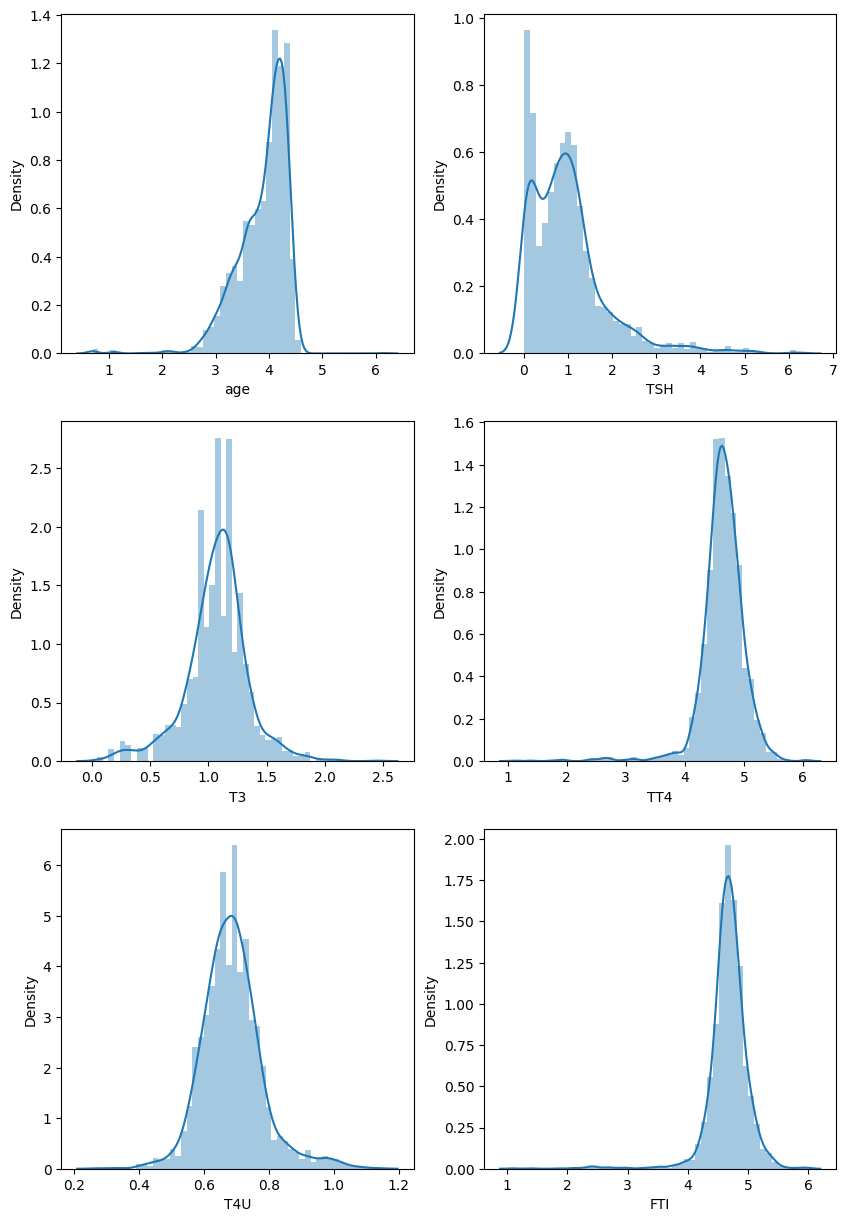

In [73]:
plt.figure(figsize=(10,15))
x=1

for i in numric_columns:
    df[i]+=1
    ax = plt.subplot(3,2,x)
    sns.distplot(np.log(df[i]))
    plt.xlabel(i, fontsize=10)
    x+=1
plt.show()